Plot for complete markets

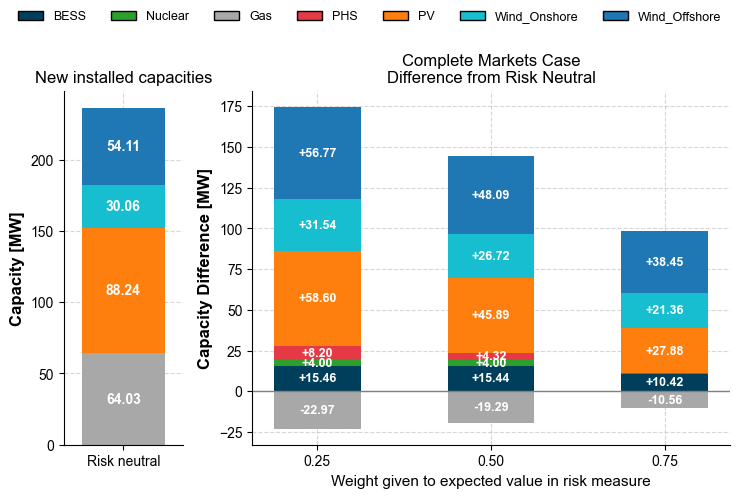

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Arial'
rcParams['axes.labelweight'] = 'bold'

# === Load data ===
df_raw = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\risk_aversion_results_O30_T672_new_final_unserved_fix_flex_gaspricescaled_cinvEldescheap_conwind.csv")
df = df_raw[df_raw["delta"] != 0]

# === Filter relevant columns ===
capacity_cols = ['PV', 'Gas', 'Wind_Onshore', 'Wind_Offshore', 'Nuclear', 'BESS_P', 'LDES_PHS_P']
df = df[['delta'] + capacity_cols]

# === Split data ===
df_rn = df[df['delta'] == 1].iloc[0]
df_others = df[df['delta'] != 1].sort_values('delta')

# === Define techs, labels, and colors ===
techs = ['BESS_P', 'Nuclear',  'Gas', 'LDES_PHS_P', 'PV', 'Wind_Onshore', 'Wind_Offshore']
labels = ['BESS', 'Nuclear',  'Gas', 'PHS', 'PV', 'Wind_Onshore', 'Wind_Offshore']
#techs = ['BESS_P', 'LDES_PHS_P']
#labels = ['BESS', 'PHS']
#colors = {
#    'BESS_P': '#4e79a7',       # Blue
#    'Wind_Offshore': '#af7aa1',          # Violet
#    'Nuclear': "#73ef63",      # Gray
#    'LDES_PHS_P': '#e15759',   # Red
#    'PV': '#f28e2b',           # Orange
#    'Wind_Onshore': '#76c7c0',         # Teal
#    'Gas': "#bab0ac"
#}
colors = {
    'BESS_P': '#003f5c',         # Blue
    'Nuclear': '#2ca02c',        # Green
    'Gas': '#a8a8a8',            # Light Gray
    'LDES_PHS_P': '#e63946',     # Lighter Red
    'PV': '#ff7f0e',  #ff9933           # Orange
    'Wind_Onshore': '#17becf',   # Teal-Cyan
    'Wind_Offshore': '#1f77b4'   # Slightly darker Teal-Cyan
}

# === Plot setup ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 5), gridspec_kw={'width_ratios': [1, 4]})

for ax in [ax1, ax2]:
    ax.spines[['top', 'right']].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)

# === Left: Risk Neutral ===
bar_width = 0.35
bottom = 0
for tech in techs:
    value = df_rn[tech]
    ax1.bar(0.25, value, width=bar_width, bottom=bottom, color=colors[tech])
    #ax1.bar(0, value, width=bar_width, bottom=bottom, color=colors[tech])
    if value > 4.1:
        ax1.text(0.25, bottom + value / 2, f'{value:.2f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    bottom += value
ax1.set_xticks([0.25])
ax1.set_xlim(0, 0.5)
ax1.set_xticklabels(['Risk neutral'], fontsize=10)
ax1.set_ylabel("Capacity [MW]", fontsize=12, fontweight='bold')
ax1.set_title("New installed capacities", fontsize=12, fontweight='normal')
ax1.tick_params(labelsize=10)

# === Right: Differences ===
deltas = df_others['delta'].unique()
x = np.arange(len(deltas))
width = 0.5

bottom_pos = np.zeros_like(x, dtype=float)
bottom_neg = np.zeros_like(x, dtype=float)

for tech in techs:
    diffs = df_others[tech].values - df_rn[tech]
    for i, diff in enumerate(diffs):
        if diff >= 0:
            #ax2.bar(x[i], diff, width=width, bottom=bottom_pos[i], color=colors[tech])
            alpha = 0.4 if tech == 'Wind_Onshore' else 0.8 if tech == 'Wind_Offshore' else 0.9 if tech == 'PV' else 0.9 if tech == 'LDES_PHS_P' else 1.0 if tech == 'BESS_P' else 0.7 if tech == 'Gas' else 1.0
            ax2.bar(x[i], diff, width=width, bottom=bottom_pos[i], color=colors[tech])
            if abs(diff) > 0.9:
                ax2.text(x[i], bottom_pos[i] + diff / 2, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            if abs(diff) < 0.9 and abs(diff) > 0.5:
                ax2.text(x[i], bottom_pos[i] + diff / 3.5, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            if abs(diff) < 0.5 and abs(diff) > 0.3:
                ax2.text(x[i], bottom_pos[i] - diff/10 , f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            bottom_pos[i] += diff
        else:
            alpha = 0.4 if tech == 'Wind_Onshore' else 0.8 if tech == 'Wind_Offshore' else 0.9 if tech == 'PV' else 0.9 if tech == 'LDES_PHS_P' else 1.0 if tech == 'BESS_P' else 0.7 if tech == 'Gas' else 1.0
            ax2.bar(x[i], diff, width=width, bottom=bottom_neg[i], color=colors[tech])
            if abs(diff) > 0.3:
                ax2.text(x[i], bottom_neg[i] + diff / 2, f'{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            bottom_neg[i] += diff

ax2.set_xticks(x)
ax2.set_xticklabels([f"{d:.2f}" for d in deltas], fontsize=10)
ax2.set_xlabel("Weight given to expected value in risk measure", fontsize=11, fontweight='normal')
ax2.set_ylabel("Capacity Difference [MW]", fontsize=12, fontweight='bold')
ax2.set_title("Complete Markets Case\nDifference from Risk Neutral", fontsize=12, fontweight='normal')
ax2.axhline(0, color='gray', linewidth=1)

from matplotlib.patches import Rectangle
import matplotlib.lines as mlines

# === Legend ===
#handles = [plt.Rectangle((0, 0), 1, 1, color=colors[t]) for t in techs]
#fig.legend(handles, labels, loc='upper center', ncol=len(techs), fontsize=9, frameon=False)
handles = [Rectangle((0, 0), 1, 1, facecolor=colors[t], edgecolor='black') for t in techs]
fig.legend(handles, labels, loc='upper center', ncol=len(techs), fontsize=9, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


In [3]:

import pandas as pd

# Load the uploaded data
load_df = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\data_final\f672\concatenated_load_profiles_672_30yr_new_final.csv")
weights_df = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\data_final\f672\concatenated_weights_672_30yr_new_final.csv")

# Merge load and weight data
merged_df = pd.merge(load_df, weights_df, on=["T", "O"], how="inner")

# Compute weighted demand per timestep
merged_df["weighted_demand"] = merged_df["Load"] * merged_df["weight"]

# Total and average demand per scenario
demand_per_scenario = merged_df.groupby("O")["weighted_demand"].sum().reset_index()
demand_per_scenario["average_demand"] = demand_per_scenario["weighted_demand"] / merged_df["T"].nunique()

# Tag tail scenarios
tail_scenarios = {2, 3, 6, 9, 10, 14, 15, 17, 18, 19, 20, 21, 25, 28}
demand_per_scenario["is_tail"] = demand_per_scenario["O"].isin(tail_scenarios)

# Compute average demand for tail vs non-tail
avg_tail = demand_per_scenario[demand_per_scenario["is_tail"] == True]["average_demand"].mean()
avg_non_tail = demand_per_scenario[demand_per_scenario["is_tail"] == False]["average_demand"].mean()

avg_tail, avg_non_tail


(8.35518264594526, 8.624785062685639)

In [ ]:
This confirms that tail scenarios have slightly lower average demand, which could indeed lead the central planner to underbuild capacity as risk aversion increases — because the planner focuses more on these lower-demand scenarios.

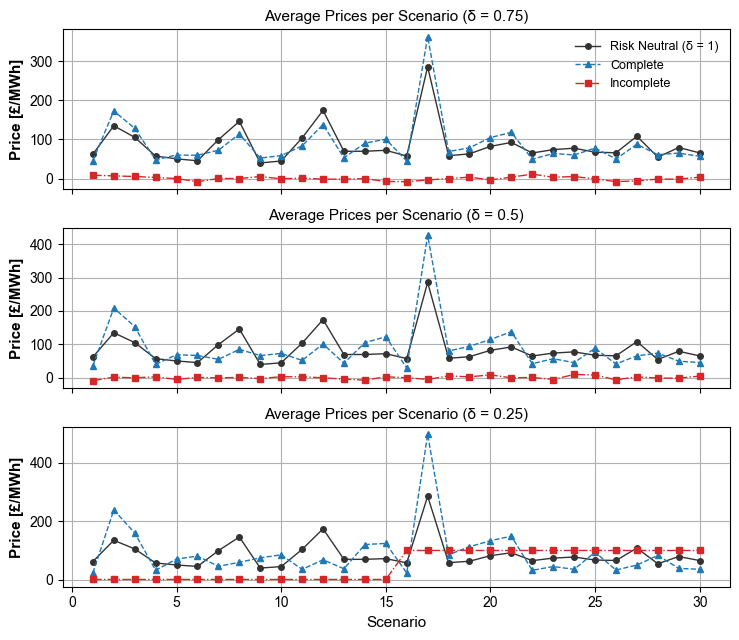

In [325]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Arial'
rcParams['axes.labelweight'] = 'bold'

scenarios = np.arange(1, 31)  # 1 to 30

# === Dummy Data (replace with actual) ===
price_risk_neutral = [
    62.2458,   # Scenario 1
    134.8005,  # Scenario 2
    105.3102,  # Scenario 3
    57.3189,   # Scenario 4
    50.4335,   # Scenario 5
    45.5006,   # Scenario 6
    99.3345,   # Scenario 7
    146.0757,  # Scenario 8
    39.9304,   # Scenario 9
    44.9068,   # Scenario 10
    103.6856,  # Scenario 11
    173.9552,  # Scenario 12
    69.6290,   # Scenario 13
    69.8164,   # Scenario 14
    72.1660,   # Scenario 15
    57.6403,   # Scenario 16
    285.2785,  # Scenario 17
    58.4029,   # Scenario 18
    63.1879,   # Scenario 19
    82.2720,   # Scenario 20
    92.3273,   # Scenario 21
    65.3336,   # Scenario 22
    73.9454,   # Scenario 23
    77.5834,   # Scenario 24
    67.3694,   # Scenario 25
    65.8369,   # Scenario 26
    108.1594,  # Scenario 27
    54.7642,   # Scenario 28
    79.3395,   # Scenario 29
    65.5641    # Scenario 30
]
price_complete_075 = [
    46.1157,   # Scenario 1
    172.7194,  # Scenario 2
    128.3033,  # Scenario 3
    48.2517,   # Scenario 4
    60.0920,   # Scenario 5
    59.5822,   # Scenario 6
    72.3096,   # Scenario 7
    113.8411,  # Scenario 8
    52.2481,   # Scenario 9
    58.7812,   # Scenario 10
    83.5358,   # Scenario 11
    137.8486,  # Scenario 12
    52.9455,   # Scenario 13
    90.4498,   # Scenario 14
    100.4553,  # Scenario 15
    44.8884,   # Scenario 16
    362.3857,  # Scenario 17
    69.1426,   # Scenario 18
    78.5597,   # Scenario 19
    104.6747,  # Scenario 20
    118.0640,  # Scenario 21
    49.5528,   # Scenario 22
    64.0704,   # Scenario 23
    60.3116,   # Scenario 24
    77.8396,   # Scenario 25
    50.2562,   # Scenario 26
    87.3812,   # Scenario 27
    61.0252,   # Scenario 28
    65.1033,   # Scenario 29
    56.8000    # Scenario 30
]
price_incomplete_075 = np.random.normal(0, 5, 30)
price_complete_050 = [
    36.1251,   # Scenario 1
    208.8343,  # Scenario 2
    153.3327,  # Scenario 3
    40.4361,   # Scenario 4
    69.0985,   # Scenario 5
    66.9362,   # Scenario 6
    55.2601,   # Scenario 7
    85.1325,   # Scenario 8
    66.4879,   # Scenario 9
    73.0699,   # Scenario 10
    52.1194,   # Scenario 11
    101.2279,  # Scenario 12
    43.6712,   # Scenario 13
    105.3024,  # Scenario 14
    122.7361,  # Scenario 15
    29.4904,   # Scenario 16
    425.8218,  # Scenario 17
    80.2003,   # Scenario 18
    94.2666,   # Scenario 19
    114.7770,  # Scenario 20
    137.8087,  # Scenario 21
    42.2056,   # Scenario 22
    57.1497,   # Scenario 23
    45.4287,   # Scenario 24
    88.4355,   # Scenario 25
    41.3665,   # Scenario 26
    65.7819,   # Scenario 27
    73.9308,   # Scenario 28
    49.8209,   # Scenario 29
    45.5867    # Scenario 30
]
price_incomplete_050 = np.random.normal(0, 5, 30)
price_complete_025 = [
    23.0159,   # Scenario 1
    238.3643,  # Scenario 2
    159.7564,  # Scenario 3
    32.3936,   # Scenario 4
    70.8704,   # Scenario 5
    80.9592,   # Scenario 6
    45.7046,   # Scenario 7
    59.7484,   # Scenario 8
    74.8002,   # Scenario 9
    85.1888,   # Scenario 10
    35.6185,   # Scenario 11
    68.1763,   # Scenario 12
    37.5903,   # Scenario 13
    120.2710,  # Scenario 14
    124.1255,  # Scenario 15
    23.2847,   # Scenario 16
    496.6990,  # Scenario 17
    85.4679,   # Scenario 18
    112.8514,  # Scenario 19
    133.2221,  # Scenario 20
    149.0545,  # Scenario 21
    32.1578,   # Scenario 22
    45.2222,   # Scenario 23
    35.5884,   # Scenario 24
    94.2591,   # Scenario 25
    33.2969,   # Scenario 26
    50.2723,   # Scenario 27
    83.2128,   # Scenario 28
    38.9094,   # Scenario 29
    35.6893    # Scenario 30
]
price_incomplete_025 = [1, 1, 1, 1, 1, 1, 1, 1, 1 ,1 ,1 ,1 ,1 ,1 ,1 ,100 ,100 ,100, 100 ,100 ,100 ,100 ,100 ,100 ,100 ,100 ,100, 100 ,100, 100]

# === Setup ===
fig, axs = plt.subplots(3, 1, figsize=(7.5, 6.5), sharex=True)

# Common styling
line_styles = {
    'Risk Neutral': '-',
    'Complete': '--',
    'Incomplete': '-.'
}
markers = {
    'Risk Neutral': {'marker': 'o', 'label': 'Risk Neutral (δ = 1)'},
    'Complete': {'marker': '^', 'label': 'Complete'},
    'Incomplete': {'marker': 's', 'label': 'Incomplete'}
}
colors = {
    'Risk Neutral': '#333333',
    'Complete': '#1f77b4',   
    'Incomplete': '#d62728'  
}

def plot_lines(ax, delta, comp, incomp):
    ax.plot(scenarios, price_risk_neutral,
            linewidth=1,
            linestyle=line_styles['Risk Neutral'],
            color=colors['Risk Neutral'],
            marker=markers['Risk Neutral']['marker'],
            markersize=4,
            label=markers['Risk Neutral']['label'])

    ax.plot(scenarios, comp,
            linewidth=1,
            linestyle=line_styles['Complete'],
            color=colors['Complete'],
            marker=markers['Complete']['marker'],
            markersize=4,
            label=markers['Complete']['label'])

    ax.plot(scenarios, incomp,
            linewidth=1,
            linestyle=line_styles['Incomplete'],
            color=colors['Incomplete'],
            marker=markers['Incomplete']['marker'],
            markersize=4,
            label=markers['Incomplete']['label'])
    ax.set_ylabel("Price [£/MWh]", fontsize=11, fontweight='bold')
    ax.set_title(f"Average Prices per Scenario (δ = {delta})", fontsize=11, fontweight='normal')
    ax.grid(True)

# Plot each subplot
plot_lines(axs[0], 0.75, price_complete_075, price_incomplete_075)
plot_lines(axs[1], 0.50, price_complete_050, price_incomplete_050)
plot_lines(axs[2], 0.25, price_complete_025, price_incomplete_025)
axs[2].set_xlabel("Scenario", fontsize=11, fontweight='normal')

# Legend only on top subplot
axs[0].legend(loc='upper right', ncol=1, frameon=False, fontsize=9)

plt.tight_layout()
plt.show()


In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Arial'
rcParams['axes.labelweight'] = 'bold'

scenarios = np.arange(1, 31)  # 1 to 30

# === Dummy Data (replace with actual) ===
price_risk_neutral = []
price_complete_075 = []
price_incomplete_075 = price_risk_neutral + np.random.normal(0, 5, 30)
price_complete_050 = []
price_incomplete_050 = price_risk_neutral + np.random.normal(0, 5, 30)
price_complete_025 = []
price_incomplete_025 = price_risk_neutral + np.random.normal(0, 5, 30)

# === Setup ===
fig, axs = plt.subplots(3, 1, figsize=(7.5, 6.5), sharex=True)

# Common styling
line_styles = {
    'Risk Neutral': '-',
    'Complete': '--',
    'Incomplete': '-.'
}
markers = {
    'Risk Neutral': {'marker': 'o', 'label': 'Risk Neutral (δ = 1)'},
    'Complete': {'marker': '^', 'label': 'Complete'},
    'Incomplete': {'marker': 's', 'label': 'Incomplete'}
}
colors = {
    'Risk Neutral': '#333333',
    'Complete': '#1f77b4',   
    'Incomplete': '#d62728'  
}

def plot_lines(ax, delta, comp, incomp):
    ax.plot(scenarios, price_risk_neutral,
            linewidth=1,
            linestyle=line_styles['Risk Neutral'],
            color=colors['Risk Neutral'],
            marker=markers['Risk Neutral']['marker'],
            markersize=4,
            label=markers['Risk Neutral']['label'])

    ax.plot(scenarios, comp,
            linewidth=1,
            linestyle=line_styles['Complete'],
            color=colors['Complete'],
            marker=markers['Complete']['marker'],
            markersize=4,
            label=markers['Complete']['label'])

    ax.plot(scenarios, incomp,
            linewidth=1,
            linestyle=line_styles['Incomplete'],
            color=colors['Incomplete'],
            marker=markers['Incomplete']['marker'],
            markersize=4,
            label=markers['Incomplete']['label'])
    ax.set_ylabel("Unserved Energy [MWh]", fontsize=11, fontweight='bold')
    ax.set_title(f"Unserved Energy per Scenario (δ = {delta})", fontsize=11, fontweight='normal')
    ax.grid(True)

# Plot each subplot
plot_lines(axs[0], 0.75, price_complete_075, price_incomplete_075)
plot_lines(axs[1], 0.50, price_complete_050, price_incomplete_050)
plot_lines(axs[2], 0.25, price_complete_025, price_incomplete_025)
axs[2].set_xlabel("Scenario", fontsize=11, fontweight='normal')

# Legend only on top subplot
axs[0].legend(loc='upper right', ncol=3, frameon=False, fontsize=9)

plt.tight_layout()
plt.show()


ValueError: operands could not be broadcast together with shapes (0,) (30,) 

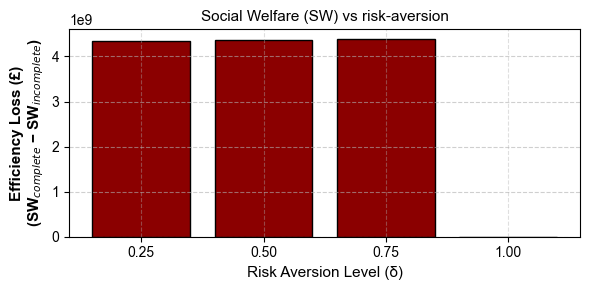

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Arial'
rcParams['axes.labelweight'] = 'bold'

# === Replace these with your actual values ===
deltas = [0.25, 0.5, 0.75, 1.0]
sw_complete = [4.346210304933086e9, 4.364906430593425e9, 4.383700848665317e9, 4.402654721051813e9]       # example social welfare values
sw_incomplete = [8500, 9000, 9700, 4.402654721051813e9]      # example values

eff_loss = np.array(sw_complete) - np.array(sw_incomplete)

# === Plotting ===
fig, ax = plt.subplots(figsize=(6, 3))

bars = ax.bar(deltas, eff_loss, width=0.2, color='#8B0000', edgecolor='black')

# Labels and grid
ax.set_ylabel("Efficiency Loss (£)\n(SW$_{complete}$ − SW$_{incomplete}$)", fontsize=11, fontweight='bold')
ax.set_xlabel("Risk Aversion Level (δ)", fontsize=11, fontweight='normal')
ax.set_xticks(deltas)
ax.set_xticklabels([f"{d:.2f}" for d in deltas])
ax.set_title("Social Welfare (SW) vs risk-aversion", fontsize=11)

# Gridlines on both axes
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
ax.grid(True, axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [297]:
import pandas as pd

# === Load your actual files ===
cf = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\data_final\f672\concatenated_capacity_factors_672_30yr_new_final_lf.csv")
demand = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\data_final\f672\concatenated_load_profiles_672_30yr_new_final.csv")
weights = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\data_final\f672\concatenated_weights_672_30yr_new_final.csv")

# === Reshape capacity factors to wide format ===
cf_wide = cf.pivot_table(index=["O", "T"], columns="G", values="value").reset_index()

# === Rename other columns ===
demand.rename(columns={"value": "demand"}, inplace=True)
weights.rename(columns={"value": "weight"}, inplace=True)

# === Merge all data on scenario (O) and time (T) ===
df = cf_wide.merge(demand, on=["O", "T"]).merge(weights, on=["O", "T"])

# === Compute weighted metrics per scenario ===
scenario_stats = []

for scenario in df["O"].unique():
    df_s = df[df["O"] == scenario]
    weight_sum = df_s["weight"].sum()

    windon_weighted = ((df_s["Wind_Onshore"]) * df_s["weight"]).sum() / weight_sum
    windoff_weighted = ((df_s["Wind_Offshore"]) * df_s["weight"]).sum() / weight_sum
    pv_weighted = (df_s["PV"] * df_s["weight"]).sum() / weight_sum
    demand_weighted = (df_s["demand"] * df_s["weight"]).sum()

    scenario_stats.append({
        "scenario": scenario,
        "windon_weighted": windon_weighted,
        "windoff_weighted": windoff_weighted,
        "pv_weighted": pv_weighted,
        "demand_weighted": demand_weighted
    })

stats_df = pd.DataFrame(scenario_stats)

stats_df.to_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Comparison_central_planner_ADMM\stats_for_scenario.csv", index=False)

